In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy
import corner

In [3]:
#Prueba con recta generada
sigma = 0.1

x = np.linspace(0,3,30)
y_base = 3*x + 7
y_rand = sigma*np.random.randn(30)
y = y_base + y_rand
y_err = sigma + 0.01*np.random.randn(30)
np.savetxt('recta.txt',(x,y,y_err))

In [9]:
#Prueba con recta del ejercicio
fit = np.load('fit_exercise.npy')
x = fit[0]
y = fit[1]
y_err = fit [2]

In [10]:
#El modelo sera una recta
def recta(x,a,b):
    return a*x + b

def likelihood(t, data):
    x = data[0]
    y = data[1]
    y_err = data[2]
    modelo = recta(x, t[0], t[1])
    result = (y-modelo)**2 / y_err**2
    return -0.5*result.sum()


def prior_a(a,R):
    if a >= (-R) and a <= R:
        p_a = 1/(2*R)
    else:
        p_a = 0
    return p_a

def prior_b(b,R):
    if b >= (-R) and b <= R:
        p_b = 1/(2*R)
    else:
        p_b = 0
    return p_b

<Figure size 432x288 with 0 Axes>

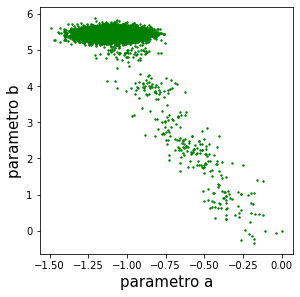

In [57]:
# sigma de a y b
sigma_a = 0.1
sigma_b = 0.1

#Parametros iniciales
ai = 0.
bi = 0.
R=10
a = [ai]
b = [bi]
posterior = likelihood([ai,bi],[x,y,y_err]) + np.log(prior_a(ai,R)) + np.log(prior_b(bi,R))


for i in range(10000): 
    #Generamos dos numeros random con los que comparar
    a_rf = np.random.normal(ai,sigma_a) 
    b_rf = np.random.normal(bi,sigma_b) 
    post_new = likelihood([a_rf,b_rf],[x,y,y_err])  + np.log(prior_a(a_rf,R)) + np.log(prior_b(b_rf,R))
    if post_new > posterior:
        a.append(a_rf)
        b.append(b_rf)
        ai = a_rf
        bi = b_rf
        posterior = post_new
        
    else:
        r = np.random.uniform(0,1)
        div = (post_new/posterior)
        if div<r:
            a.append(a_rf)
            b.append(b_rf)
            ai = a_rf
            bi = b_rf
            posterior = post_new

        else:
            a.append(a_rf)
            b.append(b_rf)
            


plt.figure(3)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(a,b,s=2,color = 'green')
plt.ylabel('parametro b',fontsize=15)
plt.xlabel('parametro a',fontsize=15);


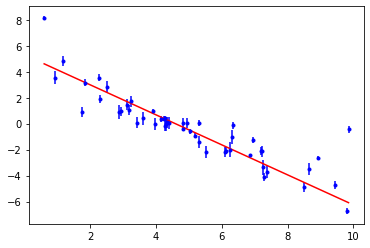

<Figure size 3600x2160 with 0 Axes>

In [58]:
plt.plot(x, a_rf*x + b_rf, color = 'red')
plt.errorbar(x, y, y_err, color = 'blue', fmt = '.')
plt.figure(figsize=(50,30));

In [41]:
def metrop_1(ai,bi,data,sigma,R):

    #Reordenamos el arreglo de a y b iniciales.

    len_ai=len(ai)
    ai = ai.T.reshape((len(ai),1))
    bi = bi.T.reshape((len(bi),1))
    data = np.array(data)
    
    posterior = [] 
    

    for i in range(len_ai):
        posterior.append(likelihood([ai[i][0],bi[i][0]],data) + np.log(prior_a(ai[i][0],R)) + np.log(prior_b(bi[i][0],R)))
    
    #Transformamos ai en lista para usar la función append.
    a_lista = ai.tolist()
    b_lista = bi.tolist()
    
    for i in range(len_ai):
        post_i = posterior[i]
        k = 0
        usar_a = a_lista[i][k]
        usar_b = b_lista[i][k]
    
        for j in range(10000): 
            a_rf = np.random.normal(usar_a,sigma)
            b_rf = np.random.normal(usar_b,sigma)
            post_new = likelihood([a_rf,b_rf],data)  + np.log(prior_a(a_rf,R)) + np.log(prior_b(b_rf,R))

            if post_new > post_i:
                a_lista[i].append(a_rf)
                b_lista[i].append(b_rf)
                usar_a = a_rf
                usar_b = b_rf
                post_i = post_new
                
                k = k+1

            else:
                r = np.random.uniform(0,1)
                div = (post_new/post_i)
                if div<r:
                    a_lista[i].append(a_rf) 
                    b_lista[i].append(b_rf)
                    usar_a = a_rf
                    usar_b = b_rf
                    post_i = post_new 
                    
                    k = k+1
                    
                else:

                    a_lista[i].append(a_rf) 
                    b_lista[i].append(b_rf)                  

                    k = k+1
            


    plt.figure(figsize=(8,6))    
    
    #Gráfica de todos los a y b creados
    for i in range(len_ai):     
        plt.scatter(a_lista[i],b_lista[i],s=1)
    plt.ylabel('parametro b',fontsize=15)
    plt.xlabel('parametro a',fontsize=15)
    plt.title("Varios Caminadores",fontsize=15)
    
    return a_lista, b_lista

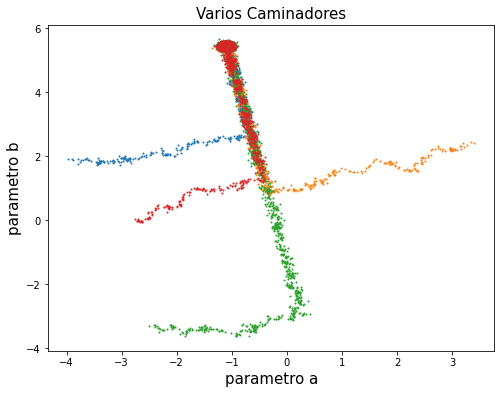

In [42]:
#multiples caminadores
data = [x,y,y_err]
sigma = 0.05
R=10
a_i = np.array([-3.9,3.4,-2.5,-2.7])
b_i = np.array([1.9,2.4,-3.3,0.0])
a_1, b_1 = metrop_1(a_i,b_i,data,sigma,R)



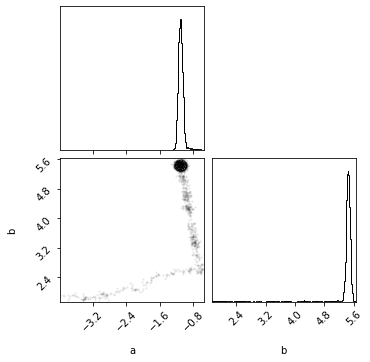

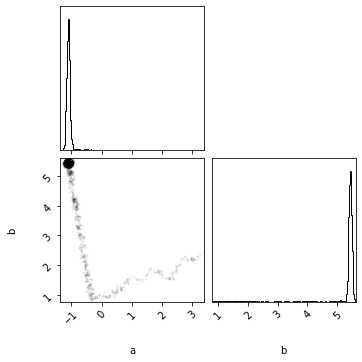

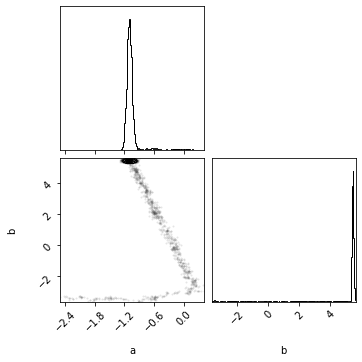

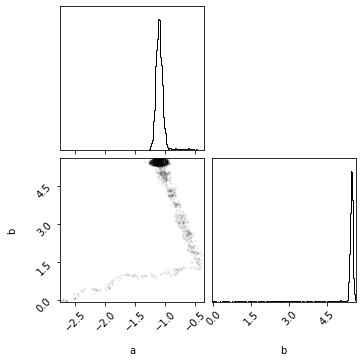

In [46]:
#triangulo
t = np.append(a,b)
t = np.append(a,b).reshape((2,len(a))).T
for i in range(len(a_i)):
    samples = np.append(a_1[i],b_1[i]).reshape((2,len(t))).T
    figure = corner.corner(samples,bins=[200,200],labels=["a", "b"])

In [52]:
#Promedios:
X_a = []
for i in range(len(a_1)):
    X_a.append(np.mean(a_1[i]))
mu_a = np.mean(X_a)

#Varianza:
Si2_a = []
for i in range(len(a_1)):
    Si2_a.append(np.std(a_1[i])**2)
S2_a = np.mean(Si2_a)


Bn_a = (1/(len(X_a)))*np.sum((X_a - mu_a)**2)
sigm2_a = ((len(a_1[0])-1)/(len(a_1[0]))) * S2_a + Bn_a
R_a = mt.sqrt(sigm2_a/S2_a)

print('R =',R_a)

R = 1.0067571752095712


In [51]:
#GelRub
#Mean:
X_b = []
for i in range(len(b_1)):
    X_b.append(np.mean(b_1[i]))
mu_b = np.mean(X_b)

#Varianza:
Si2_b = []
for i in range(len(b_1)):
    Si2_b.append(np.std(b_1[i])**2)
S2_b = np.mean(Si2_b)


Bn_b = (1/(len(X_b)))*np.sum((X_b - mu_b)**2)
sigm2_b = ((len(b_1[0])-1)/(len(b_1[0]))) * S2_b + Bn_b
R_b = mt.sqrt(sigm2_b/S2_b)

print('R =',R_b)

R = 1.0088080416804859
